In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import graphviz
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
raw = pd.read_csv('Scrapping.csv',encoding_errors='ignore',sep=';')
raw1 = pd.read_csv('500_berita_indonesia.csv',encoding_errors='ignore',sep=';')
raw2 = pd.read_csv("600 news with valid hoax label.csv",encoding_errors='ignore',sep=';')
barun = pd.read_csv('hoax.csv')
benan = pd.read_csv('fact.csv')
detik = pd.read_csv('fact_detik.csv') 

In [3]:
raw.head()

,Label,Headline,Body,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Pertamina dan Pemerintah Kalrifikasi Isu BBM N...,Foto: Kumparan.com Debunk ini berisi iKlarifik...,NaN,NaN,NaN,NaN
1,1,Polda Nusa Tenggara Barat Mengklarifkasi Bahwa...,Foto Ilustrasi Perkosaan Debunk ini berisi kla...,NaN,NaN,NaN,NaN
2,1,PT Ultrajaya Milk Industry Tbk Mengklarifikasi...,Debunk ini berisi klarifikasi dari PT Ultrajay...,NaN,NaN,NaN,NaN
3,1,BBKSDA Jatim Mengklarifikasi Bahwa Wisata Alam...,foto: tribunnews.com Debunk ini berisi Klrifik...,NaN,NaN,NaN,NaN
4,1,BMKG Mataram Menghimbau Agar Warga Tidak Langs...,Foto: tribunnews.com (Jokowi sedang memantau l...,NaN,NaN,NaN,NaN


In [4]:
raw1.head()

,kategori,berita
0,valid,"""Gunung Agung erupsi untuk pertama kali pada 2..."
1,valid,"""Jakarta, CNN Indonesia -- Menteri BUMN Erick ..."
2,valid,"""Dosen Fakultas Kedokteran Hewan IPB, Yusuf Ri..."
3,valid,"""Jakarta - Dua anggota TNI, Serda N dan Serda ..."
4,valid,"""Akui Tembak Jatuh Pesawat Ukraina, Iran Tuai ..."


In [5]:
raw2.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [6]:
raw.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],axis=1,inplace=True)

In [7]:
random = np.random.randint(0,len(barun))
print(random)
print(barun['0'][random])

2019




hasil periksa fakta Rahmah an.
Informasi palsu. Melalui akun Twitter @DitenKN, DJKN menegaskan bahwa informasi terkait lelang hanya melalui situs resmi lelang.go.id, selain itu maka dipastikan informasi tersebut adalah penipuan.
Selengkapnya di penjelasan.
===[KATEGORI]: KONTEN PALSU
===
[SUMBER]: I-Flyer

===
[NARASI]:“FESTIVAL LELANG TAHUNANModernisasi lelang untuk proses jual beli paling aman dan terpercaya atas aset rampasan oleh DJKN juga Bank Swasta.01-03 JUNI 2022″
===[PENJELASAN]:
Beredar tangkapan layar sebuah poster yang menginformasikan adanya festival lelang tahunan diselenggarakan oleh Direktorat Jenderal Kekayaan Negara (DJKN). Dalam poster tersebut disebutkan bahwa kegiatan dilaksanakan pada 1 Juni hingga 3 Juni 2022.
Setelah ditelusuri, poster festival lelang tahunan yang beredar adalah hoaks. DJKN melalui akun Twitter resminya @DitjenKn menegaskan poster tersebut adalah penipuan, informasi terkait lelang hanya melalui lelang.go.id. Pihak DJKN mengimbau agar ti

In [8]:
random = np.random.randint(0,len(raw))
print(raw['Label'][random])
print(raw['Body'][random])

1
Debunk ini berisi klarifikasi dari pihak bank BRI terkait informasi di media sosial yang menyebut pihak BRI akan memblokir ATM nasabahnya yang memiliki kartu ATM Private Label dan Kartu Classic jika tidak mengganti kartu ATM nya dengan kartu berchip. Informasi itu ditepis oleh Corporate Secretary Bank BRI, Bambang Tribaroto yang meneybut bahwa Demi mengutamakan kenyamanan para nasabahnya, Bank BRI tidak menetapkan tenggat waktu penggantian kartu debit non-chip menjadi kartu debit ber-chip. ====== : KLARIFIKASI ====== : MEDIA DARING ====== : Beredar di media sosial mengenai info bagi para nasabah bank BRI yang memiliki kartu ATM Private Label (Warna Biru) dan Kartu Classic (Warna Hijau) agar segera mengganti kartu ATM berchip paling lambat tanggal 30 oktober 2018, jika tidak ATM mereka akan di blokir. Dalam info tersebut ATM berwarna biru jenis Simpedes juga hijau (Britama) akan diblokir massal jika tidak diganti dengan ATM baru yang menggunakan teknologi chip. Info ini membuat heboh 

In [9]:
random = np.random.randint(0,len(raw1))
print(raw1['kategori'][random])
print(raw1['berita'][random])

valid
KOMPAS.com - Nintendo mengumumkan sebuah konsol terbaru yang menjadi pelengkap dari lini Nintendo Switch. Konsol bernama Nintendo Switch Lite tersebut bakal dijual dengan harga yang lebih terjangkau ketimbang versi regulernya. Lewat sebuah video singkat, General Producer Nintendo Switch, Yoshiaki Koizumi mengatakan bahwa Nintendo Switch Lite dibuat khusus untuk digunakan secara handheld. Artinya konsol ini hanya akan dapat dimainkan dalam genggaman, tanpa bisa dikoneksikan ke televisi. Menurut Koizumi, hal tersebut memang menjadi salah satu perbedaan antara Switch Lite dengan Switch versi reguler. Sesuai dengan namanya, fitur dan spesifikasi dari Nintendo Switch Lite tentu lebih rendah dan sedikit ketimbang pendahulunya. Selain tidak dapat dikoneksikan ke televisi, joystick pada Nintendo Switch Lite tidak dapat dilepas-pasang seperti Switch reguler. Alhasil jika pengguna ingin memainkan game dengan dua pemain, maka harus membeli joystick tambahan Nintendo Switch reguler. Selain d

In [10]:
random = np.random.randint(0,len(raw2))
print(raw2['tagging'][random])
print(raw2['berita'][random])

Valid
Saat salah satu anggota keluaraga terserang stroke, biasanya anggota keluarga lain berinsiatif memberi pertolongan pertama. Misalnya, dengan menusuk ujung-ujung jemari penderita dengan jarum untuk mengecek apa ia sudah mati rasa atau belum. Lalu, membuat rapat keluarga dadakan membahas si penderita stroke mau dibawa ke rumah sakit mana dan ke dokter siapa. Inisiatif tersebut, kata Prof. Dr. Dr. Mohammad Hasan Machfoed, Sp.S(K), MS tidak penting! Hal tersebut terungkap dalam talk show Grand Kalbe Academia yang mengusung tema Indonesian Neurologist Forum di Jakarta, Sabtu (4/2) kemarin. Mohammad Hasan mengatakan, begitu salah satu anggota keluarga kena stroke, harus segera dibawa ke dokter spesialis. Jangan kebanyakan berpikir, mengadakan rapat keluarga, menelepon saudara yang dituakan, bla-bla-bla. Itu malah memperburuk keadaan. Stoke tidak bisa ditolong oleh anggota keluarga sendiri. Begini, ketika seseorang kena stroke, otak tiba-tiba kekurangan oksigen dan dalam waktu 10 menit 

In [11]:
raw1['kategori'] = [1 if x == 'valid' else 0 for x in raw1['kategori']]
raw2['tagging'] = [1 if x == 'Valid' else 0 for x in raw2['tagging']]

In [12]:
detik = pd.Series(detik['0'])
semen = pd.Series([1 for x in range(len(detik))])

In [13]:
text = pd.concat([raw['Body'],raw1['berita'],raw2['berita']]).reset_index().drop('index',axis=1)
target = pd.concat([raw['Label'],raw1['kategori'],raw2['tagging']]).reset_index().drop('index',axis=1)
raw_final = pd.DataFrame({'text':text[0],'target':target[0]})
raw_final

,text,target
0,Foto: Kumparan.com Debunk ini berisi iKlarifik...,1
1,Foto Ilustrasi Perkosaan Debunk ini berisi kla...,1
2,Debunk ini berisi klarifikasi dari PT Ultrajay...,1
3,foto: tribunnews.com Debunk ini berisi Klrifik...,1
4,Foto: tribunnews.com (Jokowi sedang memantau l...,1
...,...,...
2211,Kabar yang beredar seputar rencana kenaikan ga...,1
2212,Kabar yang beredar seputar rencana kenaikan ga...,1
2213,"Akhir-akhir ini, beredar pemberitaan yang meny...",1
2214,Rancangan peraturan pemerintah (RPP) tentang G...,1


In [14]:
rawt = pd.concat([raw_final['text'],pd.Series(benan['0']),pd.Series(barun['0']),detik])
rawt = rawt.reset_index().drop('index',axis=1)[0]
rawl = [1 for x in range(len(benan))] + [0 for x in range(len(barun))]
rawl = pd.concat([raw_final['target'], pd.Series(rawl),semen])
rawl = rawl.reset_index().drop('index',axis=1)[0]
raw_final = pd.concat([rawt,rawl],axis=1,names=['text','target'])

In [15]:
raw_final.columns = ['text','target']
raw_final

,text,target
0,Foto: Kumparan.com Debunk ini berisi iKlarifik...,1
1,Foto Ilustrasi Perkosaan Debunk ini berisi kla...,1
2,Debunk ini berisi klarifikasi dari PT Ultrajay...,1
3,foto: tribunnews.com Debunk ini berisi Klrifik...,1
4,Foto: tribunnews.com (Jokowi sedang memantau l...,1
...,...,...
7664,\nJakarta - Polri mewajibkan pembuat SIM harus...,1
7665,\nJakarta - Wakil Ketua MPR RI Lestari Moerdij...,1
7666,\nJakarta - Sebanyak 19 pelaku Usaha Mikro Kec...,1
7667,\nJakarta - Dewan Pengawas (Dewas) KPK menemuk...,1


In [16]:
raw_final['target'].value_counts()

0    4141
1    3528
Name: target, dtype: int64

In [17]:
corpus = pd.read_csv('id.stopwords.02.01.2016.txt',sep=r'\n')
corpus

,ada
0,adalah
1,adanya
2,adapun
3,agak
4,agaknya
...,...
752,wong
753,yaitu
754,yakin
755,yakni


In [18]:
fact = StemmerFactory()
stemmer = fact.create_stemmer()

In [22]:
from nltk.tokenize import word_tokenize
def text_preprocessing(text):
    pattern = r'http[s]?:\/\/([a-z-.]+)\/[^ \n]*'
    pattern1 = r'http[^ \n]+'
    pattern2 = r'[0-9]+'
    rem = re.findall(pattern,text)
    data = re.sub(r'kategori[\s\S]+?sumber', ' ',text.lower())
    for x in range(len(rem)):
        data = re.sub(pattern1,rem[x],data,count=1)
    data = stemmer.stem(data)
    data = re.sub(pattern2,'@',data)
    data = ' '.join([x for x in data.split() if x not in corpus.to_numpy()])
    return data

In [23]:
text = raw_final['text']
target = raw_final['target']

In [24]:
text = text.apply(text_preprocessing)

In [564]:
text

0       foto kumpar com debunk isi iklarifikasi pertam...
1       foto ilustrasi perkosa debunk isi klarifikasi ...
2       debunk isi klarifikasi pt ultrajaya milk indus...
3       foto tribunnews com debunk isi klrifikasi sety...
4       foto tribunnews com jokowi pantau lokasi benca...
                              ...                        
7664    jakarta - polri wajib sim milik sertifikat ver...
7665    jakarta - wakil ketua mpr ri lestari moerdijat...
7666    jakarta - @ laku usaha mikro umkm lokal bina p...
7667    jakarta - dewan awas dewas kpk temu duga pungu...
7668    jakarta - orang pria nama rifkho achmad bawazi...
Name: text, Length: 7669, dtype: object

In [565]:
contoh_data_mentah = raw_final['text'][6548]
contoh_data_mentah

'\nJakarta - Ketua KPK Firli Bahuri terlihat hadir di pemakaman Wakil Ketua Komisi III DPR RI Fraksi Partai Gerindra Desmond Junaedi yang dilakukan di Al-Azhar Memorial Garden, Karawang, Jawa Barat. Firli mengaku berduka atas kabar kepergian Desmond.Filri terlihat hadir mengenakan baju berwarna putih dengan peci. Selepas mengikuti prosesi pemakaman Desmond, Filri kemudian melakukan tabur bunga di makam Desmond sembari menyampaikan doa."Kita sama-sama berduka atas wafatnya saudara-sahabat kita Bapak Desmond Junaedi Mahesa. Saya kira beliau meninggalkan banyak perjuangan dan bagi kita yang sekarang harus melanjutkan perjuangan beliau dan cita-cita beliau untuk mewujudkan cita-cita bangsa kita," ujar Firli kepada wartawan, Sabtu (24/6/2023).\n\n\r\n    ADVERTISEMENT\r\n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n        SCROLL TO RESUME CONTENT\r\n  \n\nBaca juga: Mahfud Kenang Desmond Mahesa Sosok yang Berani Kritik Siapa SajaSelain Filri, sejumlah elite Partai Gerindra, seperti Sekjen Partai Ge

In [566]:
contoh_data_praproses = text_preprocessing(contoh_data_mentah)
contoh_data_praproses

'jakarta - ketua kpk firli bahuri lihat hadir makam wakil ketua komisi iii dpr ri fraksi partai gerindra desmond junaedi laku al-azhar memorial garden karawang jawa barat firli duka kabar pergi desmond filri lihat hadir kena baju warna putih peci lepas prosesi makam desmond filri laku tabur bunga makam desmond sembari doa duka wafat saudara-sahabat desmond junaedi mahesa beliau tinggal juang juang beliau cita beliau wujud cita bangsa firli wartawan sabtu @ @ @ advertisement scroll to resume content baca mahfud kenang desmond mahesa sosok berani kritik sajaselain filri elite partai gerindra sekjen partai gerindra ahmad muzani waketum partai gerindra habiburokhman hadir makam firli juang desmond kontribusi kondisi indonesia juang biau terima kasih almarhum keluarga kabar pergi desmond ketua dpp partai gerindra sufmi dasco ahmad ada makkah tunai ibadah haji dasco kabar istri desmond baca mega airlangga zulhas ada mikir pdip desmond kemarin masuk rumah sakit mayapada subuh tinggal dunia ma

In [567]:
ebd(tvx(contoh_data_praproses))

<tf.Tensor: shape=(203, 128), dtype=float32, numpy=
array([[ 0.01428099, -0.04353331,  0.00741331, ..., -0.00276657,
        -0.03854914,  0.01312094],
       [-0.03578855,  0.01037892,  0.00700095, ..., -0.03972167,
         0.01019173,  0.0166589 ],
       [-0.00651681,  0.00162828, -0.00041366, ...,  0.02338939,
         0.01521894, -0.02664783],
       ...,
       [-0.02974738,  0.02700471, -0.03566701, ..., -0.03614386,
        -0.04645903,  0.03256175],
       [-0.04818732, -0.01897459,  0.01947622, ..., -0.03850244,
        -0.02559485, -0.03824432],
       [-0.00317419, -0.03962984,  0.03057217, ...,  0.01218405,
         0.01530346,  0.01210594]], dtype=float32)>

In [954]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
baseline_model = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('bayes',MultinomialNB())
])

In [955]:
from sklearn.model_selection import train_test_split
seed = np.random.randint(10,200)
print(seed)
train_text, test_text, train_label, test_label = train_test_split(text, target, test_size=0.2, random_state=seed)
baseline_model.fit(train_text,train_label)

158


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('bayes', MultinomialNB())])

In [956]:
train_label

5923    1
2339    1
7163    1
3101    0
4684    0
       ..
1709    1
4878    0
1400    0
5838    1
7069    1
Name: target, Length: 6135, dtype: int64

In [957]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support,classification_report
import tensorflow as tf
def score_model(y_true,y_pred):
    acc = accuracy_score(y_true,y_pred)*100
    prec,rec,fsc,_ = precision_recall_fscore_support(y_true,y_pred,average='weighted')
    model_results = {"accuracy": acc,
                  "precision": prec,
                  "recall": rec,
                  "f1": fsc}
    sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d')
    return model_results

{'accuracy': 90.22164276401564,
 'precision': 0.9021768118191305,
 'recall': 0.9022164276401564,
 'f1': 0.902140907945166}

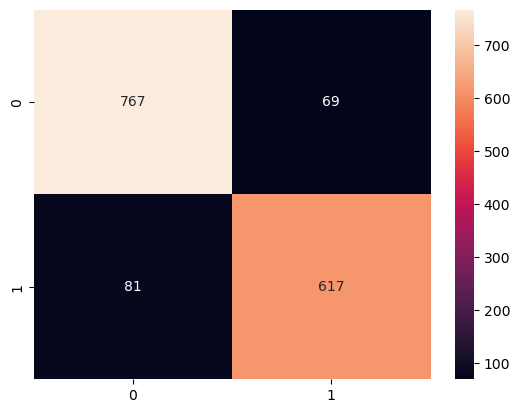

In [958]:
baseline_pred = baseline_model.predict(test_text)
score_model(test_label,baseline_pred)

In [959]:
from tensorflow.keras.layers import TextVectorization,Embedding
avg = round(sum([len(x.split()) for x in text])/len(text))
max_vocab = 50000

In [960]:
tvx = TextVectorization(
    max_tokens=max_vocab,
    output_sequence_length=avg,
    output_mode='int'
)

In [961]:
tvx.adapt(text)

In [962]:
random = np.random.randint(0,len(text))
print(random)
print(text[random])
print(tvx(text[random]))

2736
hasil periksa fakta pekik jalu utomoo fakta judul thumbnail isi video kait video temu informasi kait putri ariani hadir acara puncak resmi cawapres anies baswedan archive cob web id narasi mengejutkanputri ariani pecah panggung politik hadir acara puncak resmi cawapres anies kejut publik pecah panggung politikputri ariani hadir acara puncak resmi cawapres anies baswedan edar video channel youtube lidah rakyat tampil thumbnail gambar anies baswedan putri ariani narasi nyata putri ariani hadir acara puncak resmi cawapres anies baswedan laku telusur video tampil putri ariani identik video unggah channel youtube pkstv judul merinding performance putri ariani puncak acara milad @ pks tayang @ mei @ video asli putri ariani tampil puncak acara milad pks ke-@ acara resmi cawapres anies baswedan narator video baca artikel republika co id judul ramai medsos selamat ganjar balas foto anies putri ariani unggah @ juni @ thumbnail tampil anies baswedan putri ariani identik foto unggah liputan@ 

In [963]:
vocab = tvx.get_vocabulary()
vocab[:20]

['',
 '[UNK]',
 'ada',
 'video',
 'com',
 'laku',
 'indonesia',
 'orang',
 'jakarta',
 'hasil',
 'informasi',
 'akun',
 'rupa',
 'fakta',
 'narasi',
 'salah',
 'foto',
 'www',
 'referensi',
 'baca']

In [964]:
ebd = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding'
)

In [965]:
random = np.random.randint(0,len(text))
print(random)
print(text[random])
print(ebd(tvx(text[random])))

4223
hasil periksa fakta rahmah an yayan a nugraha klarifikasi akun facebook pribadi www facebook com akun whatsapp edar milik lengkap whatsap narasi assalamuallaikum walikum salam pripon kabare alhamdulillah sehat alhamdulillah sibuk ndak @ lgi pulang ada kerja gresik ada info tarik tau cocok undang kantor kpknl undang bank hadir acaro bonus bonus sepeda motor mobil hargane murah murah iso cicil @ denda bunga kirim gambar edar akun whatsapp ketua dpc demokrat kabupaten serang yayan a nugraha nomor @ akun pakai nama dr yayan alfian nugraha foto profil tawar barang lelang cicil @ denda bunga akun facebook pribadi www facebook com yayan anugraha klarifikasi akun milik imbau masyarakat terima pesan whatsapp mohon tanggap dasar informasi akun whatsapp ketua dpc demokrat kabupaten serang yayan a nugraha @ hoaks masuk kategori konten tiru referensi m facebook com
tf.Tensor(
[[-0.01248815 -0.03334477  0.04676852 ... -0.01171969  0.04423115
  -0.03818604]
 [ 0.02587153  0.00579812 -0.04529612 

In [966]:
from tensorflow.keras import layers,Model,Sequential
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx(inputs)
lay = ebd(lay)
lay = layers.GlobalMaxPooling1D()(lay)
lay = layers.Dense(64,activation='relu')(lay)
lay = layers.Dense(16,activation='relu')(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_1 = Model(inputs,outputs,name='model_1_dense')

In [967]:
model_1.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [968]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_130 (InputLayer)      [(None, 1)]               0         
                                                                 
 text_vectorization_14 (Text  (None, 203)              0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 203, 128)          6400000   
                                                                 
 global_max_pooling1d_85 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_204 (Dense)           (None, 64)                8256      
                                                                 
 dense_205 (Dense)           (None, 16)              

In [969]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from helper_functions import create_tensorboard_callback
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=3)
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_1.fit(
    train_text,
    train_label,
    epochs=40,
    validation_data=(test_text,test_label),
    callbacks=[max_mod,
              early_stop,]
)

Epoch 1/40
191/192 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.7775INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 12s 60ms/step - loss: 0.4117 - accuracy: 0.7782 - val_loss: 0.1601 - val_accuracy: 0.9289
Epoch 2/40
191/192 [============================>.] - ETA: 0s - loss: 0.0992 - accuracy: 0.9625INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 11s 58ms/step - loss: 0.0988 - accuracy: 0.9627 - val_loss: 0.1262 - val_accuracy: 0.9459
Epoch 3/40
192/192 [==============================] - 10s 50ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.1308 - val_accuracy: 0.9446
Epoch 4/40
191/192 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9931INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 11s 56ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.1112 - val_accuracy: 0.9576
Epoch 5/40
192/192 [==============================] - 10s 51ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.1250 - val_accuracy: 0.9511
Epoch 6/40
192/192 [==============================] - 10s 50ms/step - loss: 0.0132 - accuracy: 0.9951 - val_loss: 0.1263 - val_accuracy: 0.9557
Epoch 7/40
192/192 [==============================] - 10s 50ms/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.1234 - val_accuracy: 0.9576
Epoch 7: early stopping


<Axes: >

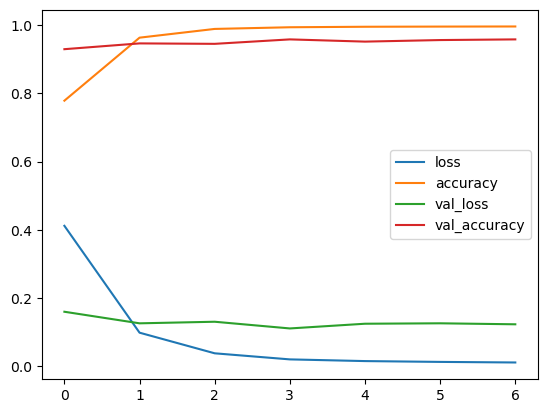

In [970]:
loss = pd.DataFrame(model_1.history.history)
loss.plot()

In [971]:
model_1.load_weights('weight_best.tf/')

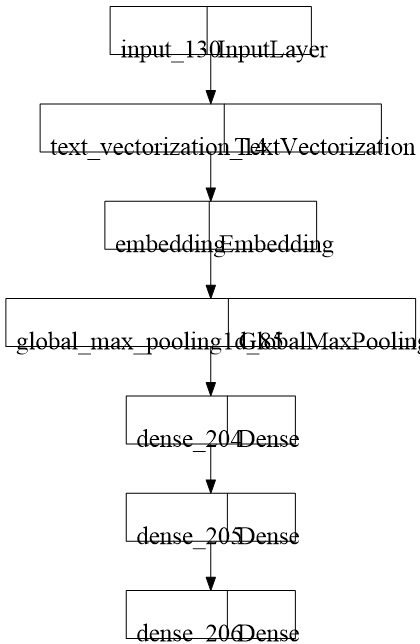

In [972]:
from tensorflow.keras.utils import plot_model
plot_model(model_1)

In [973]:
model_1.evaluate(test_text,test_label)

48/48 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.9576


[0.111223503947258, 0.9576271176338196]

In [974]:
ebd.weights

[<tf.Variable 'embedding/embeddings:0' shape=(50000, 128) dtype=float32, numpy=
 array([[-0.02032897,  0.00133921,  0.02112241, ...,  0.02620569,
         -0.02192561, -0.0143445 ],
        [-0.01656006, -0.00024055, -0.01176261, ...,  0.01665452,
          0.06780021,  0.0006129 ],
        [-0.00250987,  0.00976195, -0.03369278, ...,  0.015038  ,
         -0.03691617, -0.00604123],
        ...,
        [ 0.01337632,  0.04826964,  0.0389432 , ...,  0.04585539,
          0.03215695, -0.03192947],
        [ 0.02773908,  0.03943855,  0.01606332, ..., -0.03882045,
         -0.03173995,  0.03301723],
        [ 0.04048141, -0.02562637, -0.00329565, ..., -0.01147759,
         -0.04622053,  0.00807839]], dtype=float32)>]

48/48 [==============================] - 0s 6ms/step


{'accuracy': 95.76271186440678,
 'precision': 0.9579378465949522,
 'recall': 0.9576271186440678,
 'f1': 0.957664390595263}

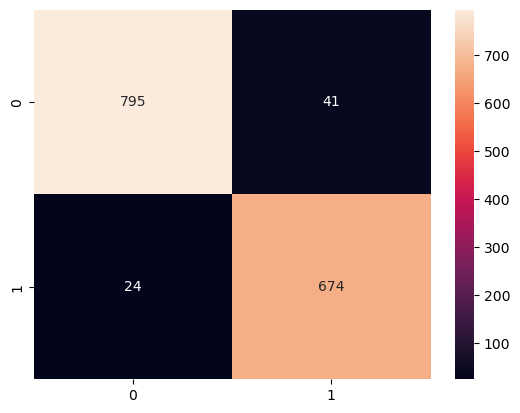

In [975]:
pred_dense = np.squeeze(np.round(model_1.predict(test_text)))
score_model(test_label,pred_dense)

In [976]:
# result = pd.DataFrame(columns=['accuracy','precision','recall','f1-score'])
# for x in range(4):
#     random = np.random.randint(10,200)
#     print('Seeds : ',random)
#     train_text, test_text, train_label, test_label = train_test_split(text, target, test_size=0.2, random_state=random)
#     tf.keras.backend.clear_session()
#     early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=2)
#     model_1.fit(
#         train_text,
#         train_label,
#         epochs=40,
#         validation_data=(test_text,test_label),
#         callbacks=[early_stop])
#     pred_dense = np.squeeze(np.round(model_1.predict(test_text)))
#     acc = accuracy_score(test_label,pred_dense)*100
#     prec,rec,fsc,_ = precision_recall_fscore_support(test_label,pred_dense,average='weighted')
#     model_results = {"accuracy": acc,
#                   "precision": prec,
#                   "recall": rec,
#                   "f1-score": fsc}
#     result = pd.concat([result,pd.DataFrame(model_results,index=[x])])
# result = pd.concat([result,pd.DataFrame(result.mean()).transpose()])
# result

In [977]:
# pred_dense = np.squeeze(np.round(model_1.predict(test_text)))
# score_model(test_label,pred_dense)

In [978]:
vocab = tvx.get_vocabulary()
wgt = model_1.get_layer('embedding').get_weights()[0]

In [979]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate( vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = wgt[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

In [980]:
ebd_2 = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_2'
)

In [981]:
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx(inputs)
lay = ebd_2(lay)
lay = layers.LSTM(64,return_sequences=True)(lay)
lay = layers.GlobalMaxPool1D()(lay)
lay = layers.Dropout(0.5)(lay)
lay = layers.Dense(16,activation='relu')(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_2 = Model(inputs,outputs,name='model_2_lstm')

In [982]:
model_2.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [983]:
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_131 (InputLayer)      [(None, 1)]               0         
                                                                 
 text_vectorization_14 (Text  (None, 203)              0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 203, 128)          6400000   
                                                                 
 lstm_14 (LSTM)              (None, 203, 64)           49408     
                                                                 
 global_max_pooling1d_86 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_103 (Dropout)       (None, 64)               

In [984]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=3)
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_2.fit(
    train_text,
    train_label,
    epochs=16,
    validation_data=(test_text,test_label),
    callbacks=[early_stop,max_mod])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.3775 - accuracy: 0.8373

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 39s 193ms/step - loss: 0.3775 - accuracy: 0.8373 - val_loss: 0.2361 - val_accuracy: 0.9100
Epoch 2/16
192/192 [==============================] - ETA: 0s - loss: 0.1863 - accuracy: 0.9247

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 37s 194ms/step - loss: 0.1863 - accuracy: 0.9247 - val_loss: 0.1514 - val_accuracy: 0.9257
Epoch 3/16
192/192 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 0.9527

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 36s 186ms/step - loss: 0.1168 - accuracy: 0.9527 - val_loss: 0.1328 - val_accuracy: 0.9368
Epoch 4/16
192/192 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9721

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 35s 185ms/step - loss: 0.0737 - accuracy: 0.9721 - val_loss: 0.1326 - val_accuracy: 0.9452
Epoch 5/16
192/192 [==============================] - 32s 167ms/step - loss: 0.0469 - accuracy: 0.9829 - val_loss: 0.1515 - val_accuracy: 0.9439
Epoch 6/16
192/192 [==============================] - 32s 165ms/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.1579 - val_accuracy: 0.9420
Epoch 7/16
192/192 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9915

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 36s 186ms/step - loss: 0.0221 - accuracy: 0.9915 - val_loss: 0.1473 - val_accuracy: 0.9485
Epoch 8/16
192/192 [==============================] - 32s 168ms/step - loss: 0.0151 - accuracy: 0.9943 - val_loss: 0.1867 - val_accuracy: 0.9433
Epoch 9/16
192/192 [==============================] - 32s 167ms/step - loss: 0.0125 - accuracy: 0.9953 - val_loss: 0.1960 - val_accuracy: 0.9472
Epoch 10/16
192/192 [==============================] - 33s 171ms/step - loss: 0.0133 - accuracy: 0.9946 - val_loss: 0.1849 - val_accuracy: 0.9439
Epoch 10: early stopping


In [985]:
model_2.load_weights('weight_best.tf/')

In [986]:
model_2.evaluate(test_text,test_label)

48/48 [==============================] - 3s 61ms/step - loss: 0.1473 - accuracy: 0.9485


[0.14731863141059875, 0.9485006332397461]

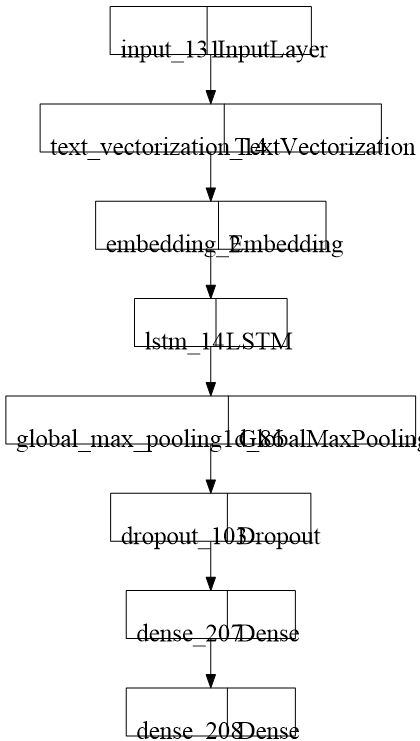

In [987]:
plot_model(model_2)

48/48 [==============================] - 3s 60ms/step


{'accuracy': 94.85006518904824,
 'precision': 0.9486174826295234,
 'recall': 0.9485006518904824,
 'f1': 0.9485262416012933}

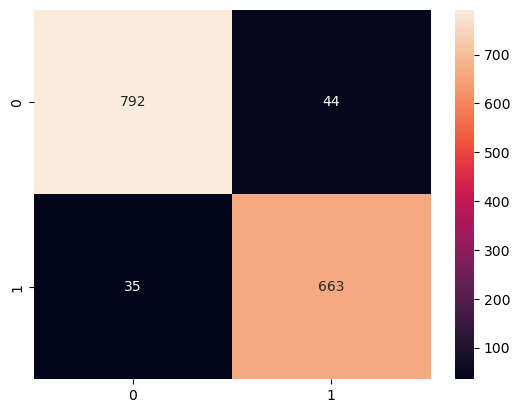

In [988]:
pred_lstm = np.squeeze(np.round(model_2.predict(test_text)))
score_model(test_label,pred_lstm)

In [989]:
ebd_3 = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_3'
)

In [990]:
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx(inputs)
lay = ebd_3(lay)
lay = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(lay)
lay = layers.GlobalMaxPool1D()(lay)
lay = layers.Dropout(0.5)(lay)
lay = layers.Dense(32,activation='relu')(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_3 = Model(inputs,outputs,name='model_3_bi-lstm')

In [991]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [992]:
model_3.summary()

Model: "model_3_bi-lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_132 (InputLayer)      [(None, 1)]               0         
                                                                 
 text_vectorization_14 (Text  (None, 203)              0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 203, 128)          6400000   
                                                                 
 bidirectional_14 (Bidirecti  (None, 203, 128)         98816     
 onal)                                                           
                                                                 
 global_max_pooling1d_87 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                   

In [993]:
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_3.fit(
    train_text,
    train_label,
    epochs=16,
    validation_data=(test_text,test_label),
    callbacks=[max_mod,
              early_stop])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.3533 - accuracy: 0.8479

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 65s 325ms/step - loss: 0.3533 - accuracy: 0.8479 - val_loss: 0.1659 - val_accuracy: 0.9335
Epoch 2/16
192/192 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.9623

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 61s 319ms/step - loss: 0.0924 - accuracy: 0.9623 - val_loss: 0.1211 - val_accuracy: 0.9400
Epoch 3/16
192/192 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9860

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 66s 342ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.1492 - val_accuracy: 0.9472
Epoch 4/16
192/192 [==============================] - 53s 277ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.1344 - val_accuracy: 0.9446
Epoch 5/16
192/192 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9923

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 63s 329ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.1294 - val_accuracy: 0.9492
Epoch 6/16
192/192 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9920

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 64s 334ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.1539 - val_accuracy: 0.9505
Epoch 7/16
192/192 [==============================] - 53s 277ms/step - loss: 0.0142 - accuracy: 0.9941 - val_loss: 0.1888 - val_accuracy: 0.9478
Epoch 8/16
192/192 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9949

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 63s 329ms/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.1661 - val_accuracy: 0.9511
Epoch 9/16
192/192 [==============================] - 54s 279ms/step - loss: 0.0113 - accuracy: 0.9958 - val_loss: 0.1974 - val_accuracy: 0.9400
Epoch 10/16
192/192 [==============================] - 53s 278ms/step - loss: 0.0107 - accuracy: 0.9953 - val_loss: 0.2042 - val_accuracy: 0.9394
Epoch 11/16
192/192 [==============================] - 54s 279ms/step - loss: 0.0154 - accuracy: 0.9946 - val_loss: 0.1793 - val_accuracy: 0.9459
Epoch 11: early stopping


In [994]:
model_3.load_weights('weight_best.tf/')

In [995]:
model_3.evaluate(test_text,test_label)

48/48 [==============================] - 5s 105ms/step - loss: 0.1661 - accuracy: 0.9511


[0.1660710573196411, 0.9511082172393799]

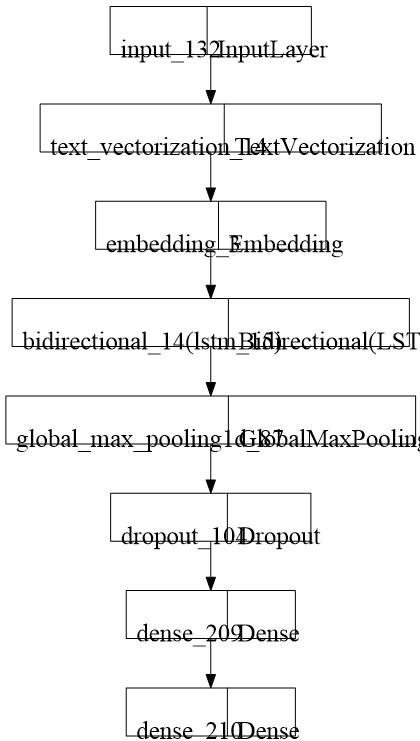

In [996]:
plot_model(model_3)

48/48 [==============================] - 6s 103ms/step


{'accuracy': 95.11082138200783,
 'precision': 0.9511638935049495,
 'recall': 0.9511082138200783,
 'f1': 0.9510670292897079}

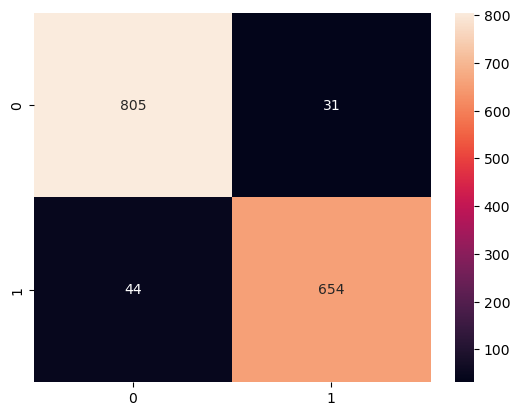

In [997]:
pred_bilstm = np.squeeze(np.round(model_3.predict(test_text)))
score_model(test_label,pred_bilstm)

In [998]:
ebd_4 = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_4'
)

In [999]:
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx(inputs)
lay = ebd_4(lay)
lay = layers.GRU(64,return_sequences=True)(lay)
lay = layers.GlobalMaxPool1D()(lay)
lay = layers.Dropout(0.5)(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_4 = Model(inputs,outputs,name='model_4_gru')

In [1000]:
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1001]:
model_4.summary()

Model: "model_4_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_133 (InputLayer)      [(None, 1)]               0         
                                                                 
 text_vectorization_14 (Text  (None, 203)              0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 203, 128)          6400000   
                                                                 
 gru_14 (GRU)                (None, 203, 64)           37248     
                                                                 
 global_max_pooling1d_88 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_105 (Dropout)       (None, 64)                

In [1002]:
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_4.fit(
    train_text,
    train_label,
    epochs=16,
    validation_data=(test_text,test_label),
    callbacks=[max_mod,
              early_stop])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.3183 - accuracy: 0.8753

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 33s 161ms/step - loss: 0.3183 - accuracy: 0.8753 - val_loss: 0.1295 - val_accuracy: 0.9485
Epoch 2/16
192/192 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9729

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 31s 162ms/step - loss: 0.0819 - accuracy: 0.9729 - val_loss: 0.1149 - val_accuracy: 0.9511
Epoch 3/16
192/192 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9873

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 31s 160ms/step - loss: 0.0432 - accuracy: 0.9873 - val_loss: 0.1114 - val_accuracy: 0.9570
Epoch 4/16
192/192 [==============================] - 28s 144ms/step - loss: 0.0317 - accuracy: 0.9922 - val_loss: 0.1446 - val_accuracy: 0.9459
Epoch 5/16
192/192 [==============================] - 27s 142ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.1480 - val_accuracy: 0.9492
Epoch 6/16
192/192 [==============================] - 28s 146ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.1235 - val_accuracy: 0.9505
Epoch 6: early stopping


In [1003]:
model_4.load_weights('weight_best.tf/')

In [1004]:
model_4.evaluate(test_text,test_label)

48/48 [==============================] - 2s 40ms/step - loss: 0.1114 - accuracy: 0.9570


[0.11144538968801498, 0.9569752216339111]

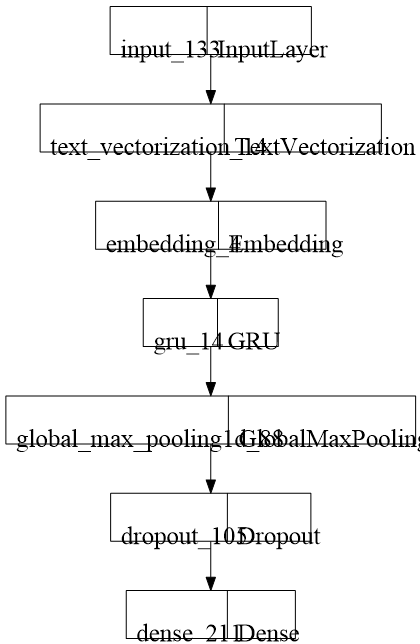

In [1005]:
plot_model(model_4)

48/48 [==============================] - 2s 40ms/step


{'accuracy': 95.69752281616688,
 'precision': 0.9571041330593183,
 'recall': 0.9569752281616688,
 'f1': 0.9569987955905634}

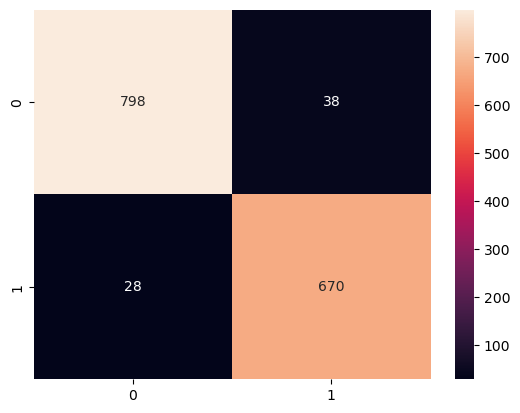

In [1006]:
pred_gru = np.squeeze(np.round(model_4.predict(test_text)))
score_model(test_label,pred_gru)

In [1007]:
ebd_5 = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_5'
)

In [1008]:
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx(inputs)
lay = ebd_5(lay)
lay = layers.Bidirectional(layers.GRU(64,return_sequences=True))(lay)
lay = layers.GlobalMaxPool1D()(lay)
lay = layers.Dropout(0.5)(lay)
lay = layers.Dense(32,activation='relu')(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_5 = Model(inputs,outputs,name='model_5_bi-gru')

In [1009]:
model_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1010]:
model_5.summary()

Model: "model_5_bi-gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_134 (InputLayer)      [(None, 1)]               0         
                                                                 
 text_vectorization_14 (Text  (None, 203)              0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 203, 128)          6400000   
                                                                 
 bidirectional_15 (Bidirecti  (None, 203, 128)         74496     
 onal)                                                           
                                                                 
 global_max_pooling1d_89 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                    

In [1011]:
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_5.fit(
    train_text,
    train_label,
    epochs=16,
    validation_data=(test_text,test_label),
    callbacks=[max_mod,
              early_stop])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.2725 - accuracy: 0.8812

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 61s 304ms/step - loss: 0.2725 - accuracy: 0.8812 - val_loss: 0.1115 - val_accuracy: 0.9492
Epoch 2/16
192/192 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9769

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 58s 305ms/step - loss: 0.0652 - accuracy: 0.9769 - val_loss: 0.1071 - val_accuracy: 0.9531
Epoch 3/16
192/192 [==============================] - 47s 245ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.1325 - val_accuracy: 0.9465
Epoch 4/16
192/192 [==============================] - 47s 245ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.1275 - val_accuracy: 0.9524
Epoch 5/16
192/192 [==============================] - 47s 246ms/step - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.1631 - val_accuracy: 0.9492
Epoch 5: early stopping


In [1012]:
model_5.load_weights('weight_best.tf/')

In [1013]:
model_5.evaluate(test_text,test_label)

48/48 [==============================] - 4s 74ms/step - loss: 0.1071 - accuracy: 0.9531


[0.10710059851408005, 0.9530639052391052]

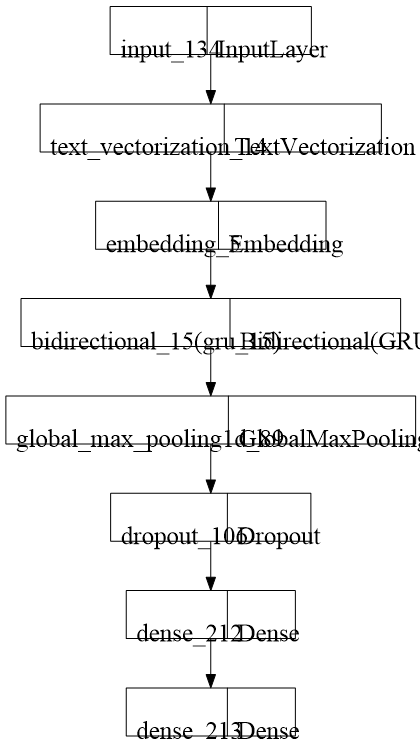

In [1014]:
plot_model(model_5)

48/48 [==============================] - 4s 74ms/step


{'accuracy': 95.30638852672752,
 'precision': 0.9532162789239919,
 'recall': 0.9530638852672751,
 'f1': 0.9530072915373307}

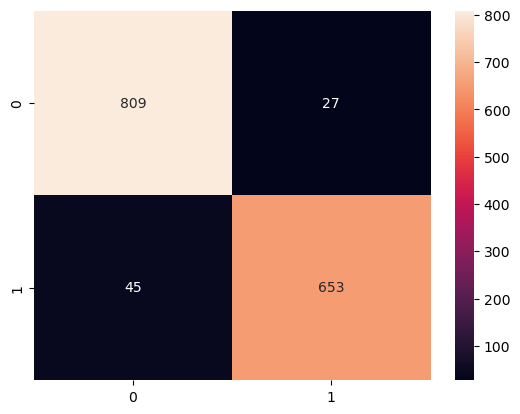

In [1015]:
pred_bigru = np.squeeze(np.round(model_5.predict(test_text)))
score_model(test_label,pred_bigru)

In [1016]:
ebd_6 = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_3'
)

In [1017]:
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx(inputs)
lay = ebd_6(lay)
lay = layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(lay)
lay = layers.Dropout(0.5)(lay)
lay = layers.GlobalMaxPool1D()(lay)
lay = layers.Dense(32,activation='relu')(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_6 = Model(inputs,outputs,name='model_6_conv1d')

In [1018]:
model_6.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [1019]:
model_6.summary()

Model: "model_6_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_135 (InputLayer)      [(None, 1)]               0         
                                                                 
 text_vectorization_14 (Text  (None, 203)              0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 203, 128)          6400000   
                                                                 
 conv1d_50 (Conv1D)          (None, 203, 64)           41024     
                                                                 
 dropout_107 (Dropout)       (None, 203, 64)           0         
                                                                 
 global_max_pooling1d_90 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                  

In [1020]:
from tensorflow.keras.callbacks import LearningRateScheduler
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model_6.fit(
    train_text,
    train_label,
    epochs=16,
    validation_data=(test_text,test_label),
    callbacks=[max_mod,
              early_stop,])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.8921

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 16s 80ms/step - loss: 0.2498 - accuracy: 0.8921 - val_loss: 0.1310 - val_accuracy: 0.9492
Epoch 2/16
192/192 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9800

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 18s 94ms/step - loss: 0.0587 - accuracy: 0.9800 - val_loss: 0.1002 - val_accuracy: 0.9628
Epoch 3/16
192/192 [==============================] - 13s 68ms/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.0992 - val_accuracy: 0.9557
Epoch 4/16
192/192 [==============================] - 13s 67ms/step - loss: 0.0207 - accuracy: 0.9946 - val_loss: 0.1067 - val_accuracy: 0.9563
Epoch 5/16
192/192 [==============================] - 13s 67ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.1065 - val_accuracy: 0.9563
Epoch 5: early stopping


In [1021]:
model_6.load_weights('weight_best.tf/')

In [1022]:
model_6.evaluate(test_text,test_label)

48/48 [==============================] - 1s 10ms/step - loss: 0.1002 - accuracy: 0.9628


[0.10017980635166168, 0.9628422260284424]

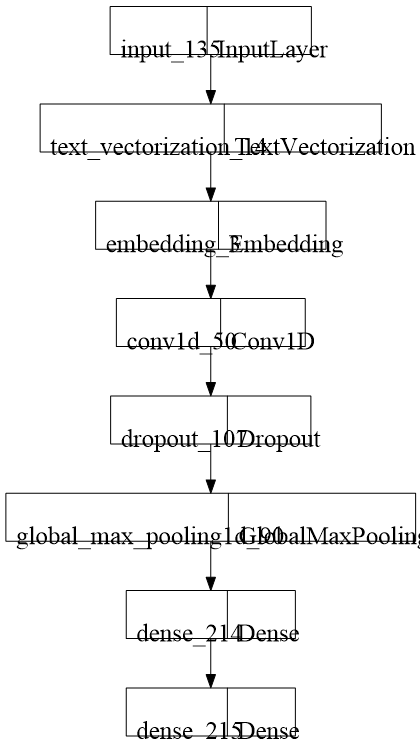

In [1023]:
plot_model(model_6)

<Axes: >

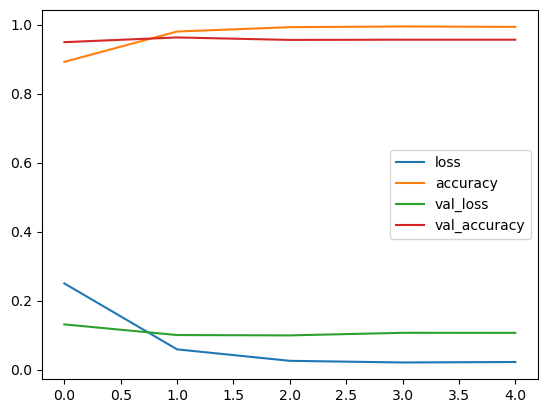

In [1024]:
pd.DataFrame(history.history).plot()

48/48 [==============================] - 1s 10ms/step


{'accuracy': 96.28422425032595,
 'precision': 0.9628386410588978,
 'recall': 0.9628422425032594,
 'f1': 0.9628400294383719}

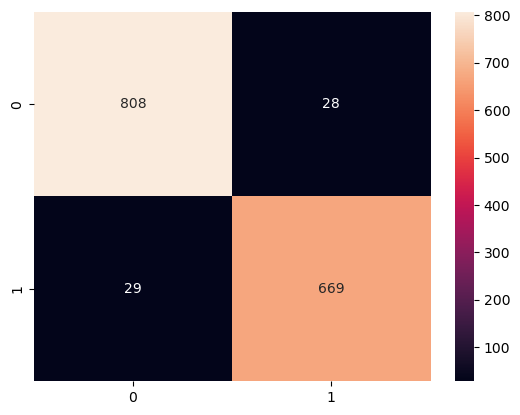

In [1025]:
pred_conv1d = np.squeeze(np.round(model_6.predict(test_text)))
score_model(test_label,pred_conv1d)

In [1026]:
coba = text_preprocessing('''Hasil Periksa Fakta Dyah Febriyani

Faktanya video tersebut merupakan acara Reuni 212 pada tahun 2022. Tidak ditemukan dalam video pernyataan yang menyebut Anies Baswedan didukung oleh orde baru.

============
[KATEGORI]

Konten yang menyesatkan

===========
[SUMBER]

Instagram
https://archive.cob.web.id/archive/1687284102.451279/singlefile.html

==========
[NARASI]

“Ada ORBA di belakang Anies”

===============
[PENJELASAN]

Sebuah akun Instagram mengunggah video dengan klaim ada Order Baru di belakang Anies Baswedan. Video itu memperlihatkan Titiek Soeharto memberikan sambutan acara. Titiek terlihat menyebutkan anggota keluarganya yang turut hadir dalam acara.

Berdasarkan penelusuran Google Lens, acara pada video tersebut merupakan kegiatan Reuni 212 di Masjid At-Tin Jakarta Timur pada Desember 2022 lalu. Tak hanya Titiek dan Rizieq, beberapa tokoh lainnya juga tampak hadir pada Reuni 212. Di antaranya Ketua Umum PA 212 Abdul Qohar, Ketum GNPF Ulama Yusuf Martak hingga Ketum Front Persaudaraan Islam Muhammad Alatas.

Tidak ditemukan dalam video sebuah pernyataan bahwa Anies Baswedan didukung oleh orde baru. Unggahan tersebut termasuk dalam konten yang menyesatkan.

=============
[REFERENSI]

https://youtu.be/raaqertws4g

https://www.cnnindonesia.com/nasional/20221202030251-20-881691/rizieq-shihab-hingga-titiek-soeharto-hadiri-reuni-212
''')
coba

'hasil periksa fakta dyah febriyani fakta video rupa acara reuni @ @ temu video nyata anies baswedan dukung orde instagram archive cob web id narasi ada orba anies buah akun instagram unggah video klaim ada order anies baswedan video lihat titiek soeharto sambut acara titiek lihat anggota keluarga hadir acara dasar telusur google lens acara video rupa giat reuni @ masjid at-tin jakarta timur desember @ titiek rizieq tokoh hadir reuni @ ketua pa @ abdul qohar tum gnpf ulama yusuf martak tum front saudara islam muhammad alatas temu video buah nyata anies baswedan dukung orde unggah masuk konten sesat referensi youtu be www cnnindonesia com'

In [1027]:
model_6.predict(pd.Series(coba))

1/1 [==============================] - 0s 30ms/step


array([[0.00168765]], dtype=float32)

In [1028]:
np.array(['gg']).shape

(1,)

In [1029]:
def word_processing(txt):
    txt = text_preprocessing(txt)
    txt = np.array([[y for y in x] for x in txt.split()])
    if txt != []:
        txt = np.hstack(txt)
    txt = ' '.join(txt)
    return txt

In [1030]:
word_processing('''Hasil Periksa Fakta Dyah Febriyani

Faktanya video tersebut merupakan acara Reuni 212 pada tahun 2022. Tidak ditemukan dalam video pernyataan yang menyebut Anies Baswedan didukung oleh orde baru.

============
[KATEGORI]

Konten yang menyesatkan

===========
[SUMBER]

Instagram
https://archive.cob.web.id/archive/1687284102.451279/singlefile.html

==========
[NARASI]

“Ada ORBA di belakang Anies”

===============
[PENJELASAN]

Sebuah akun Instagram mengunggah video dengan klaim ada Order Baru di belakang Anies Baswedan. Video itu memperlihatkan Titiek Soeharto memberikan sambutan acara. Titiek terlihat menyebutkan anggota keluarganya yang turut hadir dalam acara.

Berdasarkan penelusuran Google Lens, acara pada video tersebut merupakan kegiatan Reuni 212 di Masjid At-Tin Jakarta Timur pada Desember 2022 lalu. Tak hanya Titiek dan Rizieq, beberapa tokoh lainnya juga tampak hadir pada Reuni 212. Di antaranya Ketua Umum PA 212 Abdul Qohar, Ketum GNPF Ulama Yusuf Martak hingga Ketum Front Persaudaraan Islam Muhammad Alatas.

Tidak ditemukan dalam video sebuah pernyataan bahwa Anies Baswedan didukung oleh orde baru. Unggahan tersebut termasuk dalam konten yang menyesatkan.

=============
[REFERENSI]

https://youtu.be/raaqertws4g

https://www.cnnindonesia.com/nasional/20221202030251-20-881691/rizieq-shihab-hingga-titiek-soeharto-hadiri-reuni-212
''')

'h a s i l p e r i k s a f a k t a d y a h f e b r i y a n i f a k t a v i d e o r u p a a c a r a r e u n i @ @ t e m u v i d e o n y a t a a n i e s b a s w e d a n d u k u n g o r d e i n s t a g r a m a r c h i v e c o b w e b i d n a r a s i a d a o r b a a n i e s b u a h a k u n i n s t a g r a m u n g g a h v i d e o k l a i m a d a o r d e r a n i e s b a s w e d a n v i d e o l i h a t t i t i e k s o e h a r t o s a m b u t a c a r a t i t i e k l i h a t a n g g o t a k e l u a r g a h a d i r a c a r a d a s a r t e l u s u r g o o g l e l e n s a c a r a v i d e o r u p a g i a t r e u n i @ m a s j i d a t - t i n j a k a r t a t i m u r d e s e m b e r @ t i t i e k r i z i e q t o k o h h a d i r r e u n i @ k e t u a p a @ a b d u l q o h a r t u m g n p f u l a m a y u s u f m a r t a k t u m f r o n t s a u d a r a i s l a m m u h a m m a d a l a t a s t e m u v i d e o b u a h n y a t a a n i e s b a s w e d a n d u k u n g o r d e u n g g a h m a s u k k o n t e n

In [1031]:
char_text = raw_final['text'].apply(word_processing)

In [1032]:
print(seed)
train_char_text, test_char_text, train_label, test_label = train_test_split(char_text, target, test_size=0.2, random_state=seed)

158


In [1033]:
avg_char = int(np.percentile([len(x.split()) for x in char_text],95))
tvx_char = TextVectorization(
    output_sequence_length=avg_char,
    standardize=None,
)
tvx_char.adapt(char_text)
ebd_char = Embedding(
    input_dim=len(tvx_char.get_vocabulary()),
    output_dim=32,
    mask_zero=False,
    name = 'embedding_char'
)

In [1034]:
inputs = layers.Input(shape=(1,),dtype='string')
lay = tvx_char(inputs)
lay = ebd_char(lay)
lay = layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(lay)
lay = layers.Dropout(0.5)(lay)
lay = layers.GlobalMaxPool1D()(lay)
outputs = layers.Dense(1,activation='sigmoid')(lay)
model_char = Model(inputs,outputs,name='model_char')

In [1035]:
model_char.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [1036]:
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_char.fit(
    train_char_text,
    train_label,
    epochs=24,
    validation_data=(test_char_text,test_label),
    callbacks=[max_mod,
              early_stop])

Epoch 1/24
192/192 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 0.7757

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 24s 122ms/step - loss: 0.4935 - accuracy: 0.7757 - val_loss: 0.3445 - val_accuracy: 0.8768
Epoch 2/24
192/192 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 0.8896

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 24s 123ms/step - loss: 0.2563 - accuracy: 0.8896 - val_loss: 0.2625 - val_accuracy: 0.8977
Epoch 3/24
192/192 [==============================] - ETA: 0s - loss: 0.2116 - accuracy: 0.9058

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 24s 123ms/step - loss: 0.2116 - accuracy: 0.9058 - val_loss: 0.2288 - val_accuracy: 0.9087
Epoch 4/24
192/192 [==============================] - 23s 118ms/step - loss: 0.1951 - accuracy: 0.9128 - val_loss: 0.2183 - val_accuracy: 0.9048
Epoch 5/24
192/192 [==============================] - ETA: 0s - loss: 0.1809 - accuracy: 0.9249

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 23s 121ms/step - loss: 0.1809 - accuracy: 0.9249 - val_loss: 0.2083 - val_accuracy: 0.9100
Epoch 6/24
192/192 [==============================] - ETA: 0s - loss: 0.1762 - accuracy: 0.9200

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 23s 122ms/step - loss: 0.1762 - accuracy: 0.9200 - val_loss: 0.2071 - val_accuracy: 0.9120
Epoch 7/24
192/192 [==============================] - ETA: 0s - loss: 0.1638 - accuracy: 0.9309

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 24s 123ms/step - loss: 0.1638 - accuracy: 0.9309 - val_loss: 0.2051 - val_accuracy: 0.9126
Epoch 8/24
192/192 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9332

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 24s 123ms/step - loss: 0.1608 - accuracy: 0.9332 - val_loss: 0.1953 - val_accuracy: 0.9140
Epoch 9/24
192/192 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.9368

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 23s 122ms/step - loss: 0.1503 - accuracy: 0.9368 - val_loss: 0.1922 - val_accuracy: 0.9179
Epoch 10/24
192/192 [==============================] - ETA: 0s - loss: 0.1467 - accuracy: 0.9392

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 23s 122ms/step - loss: 0.1467 - accuracy: 0.9392 - val_loss: 0.1905 - val_accuracy: 0.9198
Epoch 11/24
192/192 [==============================] - 23s 117ms/step - loss: 0.1419 - accuracy: 0.9402 - val_loss: 0.1874 - val_accuracy: 0.9179
Epoch 12/24
192/192 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.9434

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 23s 121ms/step - loss: 0.1364 - accuracy: 0.9434 - val_loss: 0.1838 - val_accuracy: 0.9231
Epoch 13/24
192/192 [==============================] - 23s 118ms/step - loss: 0.1323 - accuracy: 0.9456 - val_loss: 0.1887 - val_accuracy: 0.9094
Epoch 14/24
192/192 [==============================] - 22s 116ms/step - loss: 0.1268 - accuracy: 0.9439 - val_loss: 0.1829 - val_accuracy: 0.9205
Epoch 15/24
192/192 [==============================] - 22s 116ms/step - loss: 0.1310 - accuracy: 0.9433 - val_loss: 0.1791 - val_accuracy: 0.9224
Epoch 15: early stopping


In [1037]:
model_char.load_weights('weight_best.tf/')

In [1038]:
model_char.evaluate(test_char_text,test_label)

48/48 [==============================] - 1s 19ms/step - loss: 0.1838 - accuracy: 0.9231


[0.1838146597146988, 0.9230769276618958]

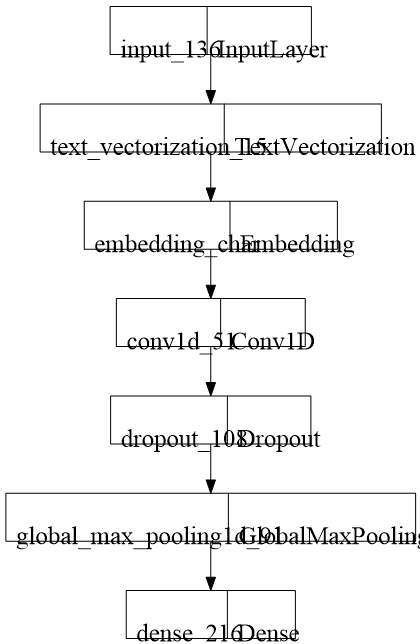

In [1039]:
plot_model(model_char)

48/48 [==============================] - 1s 18ms/step


{'accuracy': 92.3076923076923,
 'precision': 0.9230980051123936,
 'recall': 0.9230769230769231,
 'f1': 0.9230858850143885}

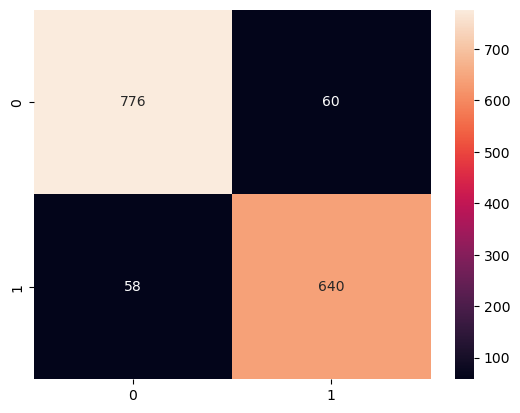

In [1040]:
pred_char = np.squeeze(np.round(model_char.predict(test_char_text)))
score_model(test_label,pred_char)

In [1041]:
raw_final['kata'] = [len(x.split()) for x in text]
def kalimat(txt):
    txt = re.sub(r'=+','',txt)
    txt = re.sub(r'http[^ \n]+','',txt)
    leng = len(re.findall(r'[^\n.]+',txt))
    return leng
raw_final['kalimat'] = [kalimat(x) for x in raw_final['text']]
raw_final

,text,target,kata,kalimat,angka,link
0,Foto: Kumparan.com Debunk ini berisi iKlarifik...,1,286,31,15,4
1,Foto Ilustrasi Perkosaan Debunk ini berisi kla...,1,168,17,1,1
2,Debunk ini berisi klarifikasi dari PT Ultrajay...,1,306,25,3,3
3,foto: tribunnews.com Debunk ini berisi Klrifik...,1,187,23,9,1
4,Foto: tribunnews.com (Jokowi sedang memantau l...,1,192,21,9,4
...,...,...,...,...,...,...
7664,\nJakarta - Polri mewajibkan pembuat SIM harus...,1,208,31,6,0
7665,\nJakarta - Wakil Ketua MPR RI Lestari Moerdij...,1,203,22,6,0
7666,\nJakarta - Sebanyak 19 pelaku Usaha Mikro Kec...,1,445,40,11,0
7667,\nJakarta - Dewan Pengawas (Dewas) KPK menemuk...,1,146,22,5,0


In [1042]:
raw_final['angka'] = [len(re.findall('@',x)) for x in text]
raw_final['link'] = [len(re.findall(r'http[^ \n]+',x)) for x in raw_final['text']]
raw_final

,text,target,kata,kalimat,angka,link
0,Foto: Kumparan.com Debunk ini berisi iKlarifik...,1,286,31,31,4
1,Foto Ilustrasi Perkosaan Debunk ini berisi kla...,1,168,17,2,1
2,Debunk ini berisi klarifikasi dari PT Ultrajay...,1,306,25,7,3
3,foto: tribunnews.com Debunk ini berisi Klrifik...,1,187,23,18,1
4,Foto: tribunnews.com (Jokowi sedang memantau l...,1,192,21,19,4
...,...,...,...,...,...,...
7664,\nJakarta - Polri mewajibkan pembuat SIM harus...,1,208,31,12,0
7665,\nJakarta - Wakil Ketua MPR RI Lestari Moerdij...,1,203,22,13,0
7666,\nJakarta - Sebanyak 19 pelaku Usaha Mikro Kec...,1,445,40,23,0
7667,\nJakarta - Dewan Pengawas (Dewas) KPK menemuk...,1,146,22,11,0


In [1043]:
raw_final['link'].value_counts()

0     3128
2     1376
3     1076
4      670
1      569
5      340
6      159
7       80
9       57
8       45
11      44
13      42
10      23
12      21
15      13
14      10
17       4
21       2
23       2
19       2
20       2
16       2
18       1
42       1
Name: link, dtype: int64

In [1044]:
raw_final.corr()

,target,kata,kalimat,angka,link
target,1.000000,0.210911,0.236393,0.224573,-0.366722
kata,0.210911,1.000000,0.862350,0.703360,0.310834
kalimat,0.236393,0.862350,1.000000,0.630845,0.318970
angka,0.224573,0.703360,0.630845,1.000000,0.196124
link,-0.366722,0.310834,0.318970,0.196124,1.000000


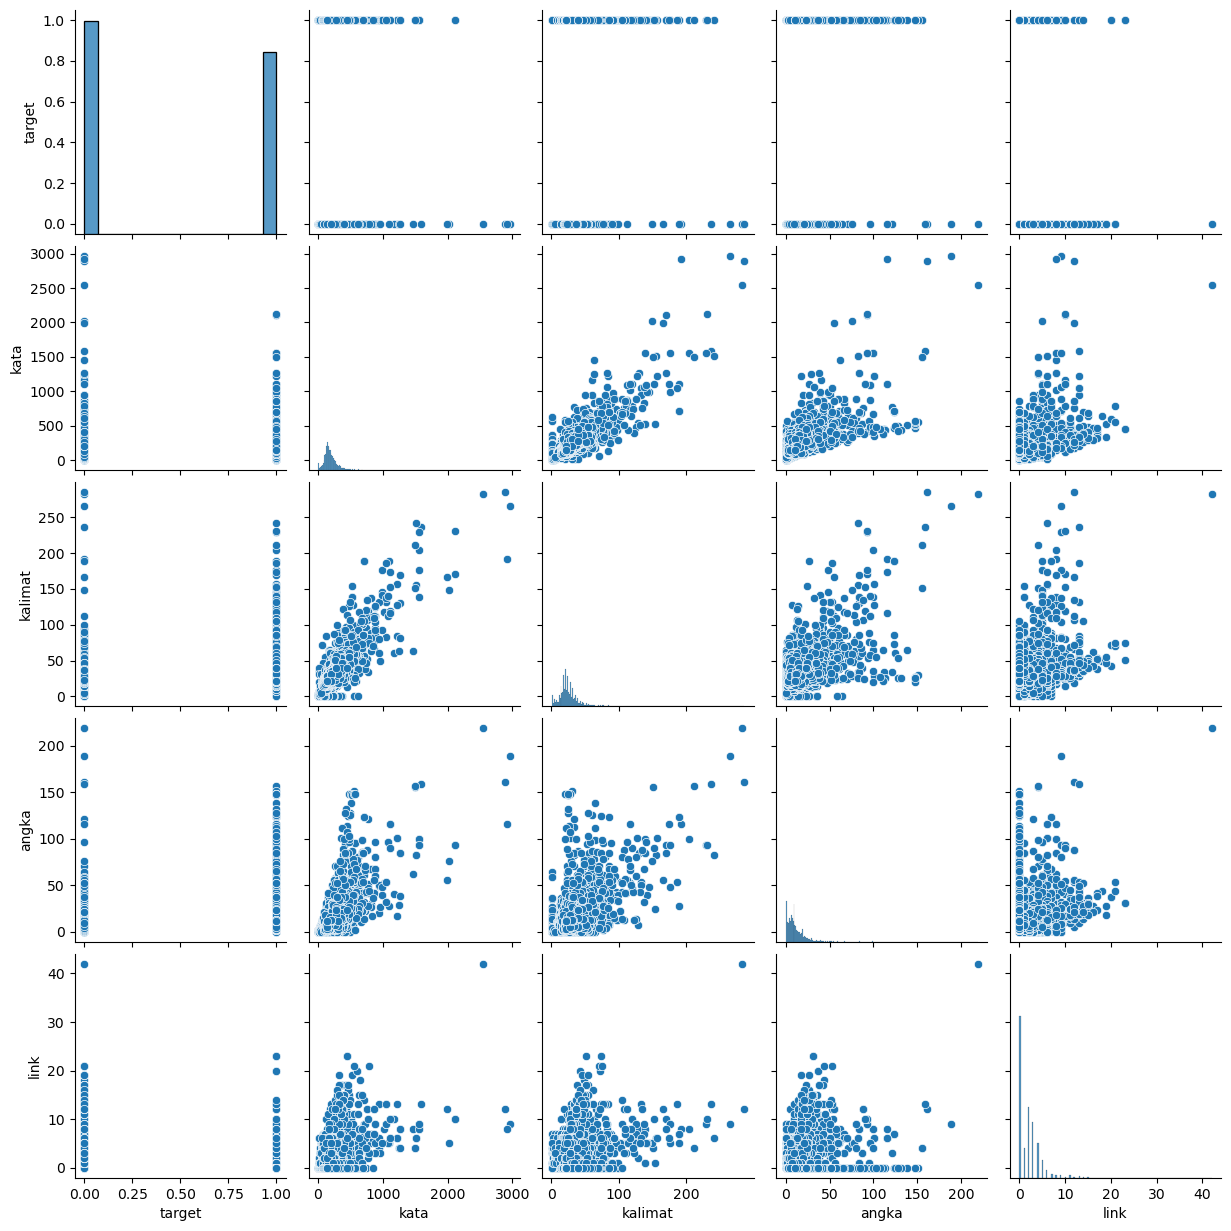

In [1045]:
sns.pairplot(raw_final)

<Axes: >

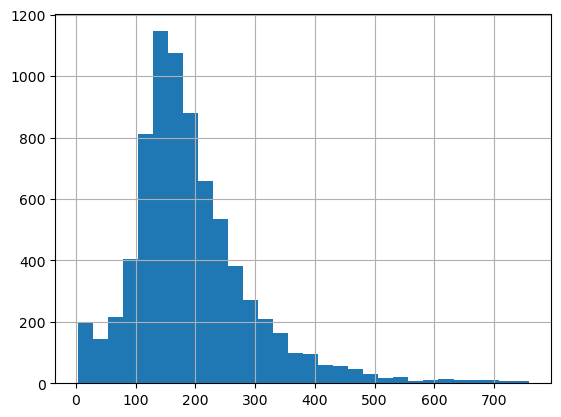

In [1046]:
raw_final[raw_final['kata'] <= 759]['kata'].hist(bins=30)

<Axes: >

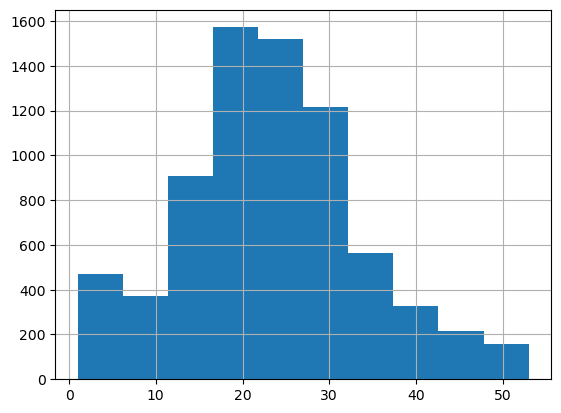

In [1047]:
raw_final[raw_final['kalimat'] < 54]['kalimat'].hist()

In [1048]:
raw_final[raw_final['kalimat'] <= 6]['kalimat'].value_counts()

1    170
6     70
5     69
4     67
3     59
2     36
Name: kalimat, dtype: int64

In [1049]:
np.percentile(raw_final['kalimat'],95),np.percentile(raw_final['kata'],95),np.percentile(raw_final['angka'],95),np.percentile(raw_final['link'],95)

(52.0, 403.0, 35.0, 6.0)

In [1050]:
thre = np.arange(0,761,20)
for x in range(len(thre)-1):
    raw_final['kata'] = [x if y>thre[x] and y<=thre[x+1] else y for y in raw_final['kata']]
raw_final['kata'] = [39 if y>760 else y for y in raw_final['kata']]
raw_final['kata'].value_counts()

7     933
6     837
8     803
9     715
10    578
5     570
11    453
12    401
4     312
13    292
14    219
3     180
0     166
15    163
16    155
2     133
17    107
1      97
19     88
18     80
39     71
20     48
21     40
23     39
22     37
24     24
25     19
26     17
31     15
27     14
34      9
30      9
33      9
29      8
28      7
35      7
37      6
36      5
32      3
Name: kata, dtype: int64

In [1051]:
raw_final['kalimat'] = [0 if x == 1 else x for x in raw_final['kalimat']]
thre = np.arange(1,57,5)
for x in range(len(thre)-1):
    raw_final['kalimat'] = [x+1 if y>thre[x] and y<=thre[x+1] else y for y in raw_final['kalimat']]
raw_final['kalimat'] = [13 if y>54 else y for y in raw_final['kalimat']]
raw_final['kalimat'].value_counts()

4     1572
5     1519
6     1065
3      907
7      631
2      373
8      367
1      301
13     279
9      224
0      170
10     147
11     114
Name: kalimat, dtype: int64

In [1052]:
thre = np.arange(1,36,2)
for x in range(len(thre)-1):
    raw_final['angka'] = [x+1 if y>thre[x] and y<=thre[x+1] else y for y in raw_final['angka']]
raw_final['angka'] = [19 if y>35 else y for y in raw_final['angka']]
raw_final['angka'].value_counts()

1     1047
3      987
2      865
4      815
5      646
6      531
0      517
7      403
19     360
8      326
9      290
10     215
11     191
12     139
13     113
14      74
15      64
17      47
16      39
Name: angka, dtype: int64

In [1053]:
raw_final['link'] = [14 if y>13 else y for y in raw_final['link']]
raw_final['link'].value_counts()

0     3128
2     1376
3     1076
4      670
1      569
5      340
6      159
7       80
9       57
8       45
11      44
13      42
14      39
10      23
12      21
Name: link, dtype: int64

In [1054]:
kata = pd.DataFrame(tf.one_hot(raw_final['kata'],depth=38))
kalimat = pd.DataFrame(tf.one_hot(raw_final['kalimat'],depth=12))
link = pd.DataFrame(tf.one_hot(raw_final['link'],depth=14))
angka = pd.DataFrame(tf.one_hot(raw_final['angka'],depth=18))

In [1055]:
len(kata),len(target)

(7669, 7669)

In [1056]:
train_kalimat, test_kalimat, train_label, test_label = train_test_split(kalimat, target, test_size=0.2, random_state=seed)
train_kata, test_kata, train_label, test_label = train_test_split(kata, target, test_size=0.2, random_state=seed)
train_angka, test_angka, train_label, test_label = train_test_split(angka, target, test_size=0.2, random_state=seed)
train_link, test_link, train_label, test_label = train_test_split(link, target, test_size=0.2, random_state=seed)

In [1057]:
fit = raw_final[['kalimat','kata', 'angka', 'link','target']]
train_fit_text, test_fit_text, train_label, test_label = train_test_split(fit[['kalimat', 'angka','kata', 'link']], fit['target'], test_size=0.2, random_state=seed)

In [1058]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(train_fit_text,train_label)

RandomForestClassifier(n_estimators=500)

{'accuracy': 85.72359843546285,
 'precision': 0.8571334082191039,
 'recall': 0.8572359843546284,
 'f1': 0.8571549751394169}

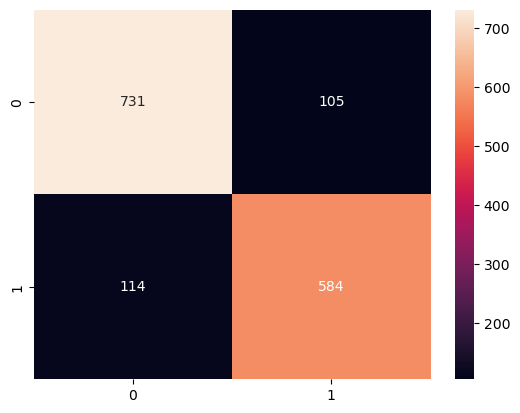

In [1059]:
pred_rfc = rfc.predict(test_fit_text)
score_model(test_label,pred_rfc)

In [1060]:
ebd_hy = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_hybrid'
)

In [1061]:
#Token embedding
input_tok = layers.Input(shape=(1,),dtype='string')
x = tvx(input_tok)
x = ebd_hy(x)
x = layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalMaxPool1D()(x)
token_model = Model(input_tok,x)

#Character embedding
input_char = layers.Input(shape=(1,),dtype='string')
y = tvx_char(input_char)
y = ebd_char(y)
y = layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(y)
y = layers.Dropout(0.5)(y)
y = layers.GlobalMaxPool1D()(y)
char_model = Model(input_char,y)

#Concatenate
token_char = layers.Concatenate(name='token_char_hybrid')([token_model.output,char_model.output])

#Avoid overfitting
z = layers.Dropout(0.2)(token_char)
z = layers.Dense(32,activation='relu')(z)
z = layers.Dropout(0.2)(z)
outputs = layers.Dense(1,activation='sigmoid')(z)

#Construct
hybrid_model = Model(inputs=[token_model.input,char_model.input],
                    outputs=outputs,
                    name='hybrid_model_token_char_embedding')

#Compile
hybrid_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [1062]:
hybrid_model.summary()

Model: "hybrid_model_token_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_137 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_138 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_14 (TextVec  (None, 203)         0           ['input_137[0][0]']              
 torization)                                                                                      
                                                                                                  
 text_vectorization_15 (TextVec  (None, 2151)        0           [

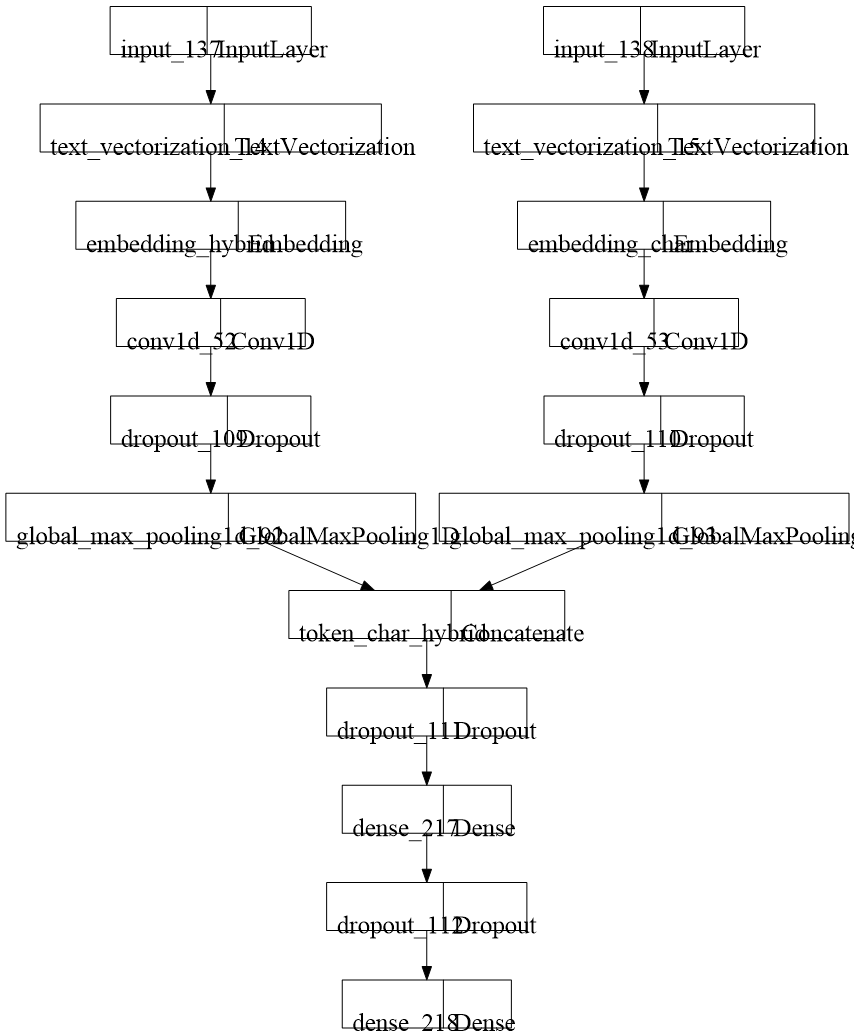

In [1063]:
plot_model(hybrid_model)

In [1064]:
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
hybrid_model.fit(
    [train_text, train_char_text],
    train_label,
    epochs=16,
    validation_data=([test_text, test_char_text],test_label),
    callbacks=[max_mod,
              early_stop])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8530

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 36s 183ms/step - loss: 0.3039 - accuracy: 0.8530 - val_loss: 0.1446 - val_accuracy: 0.9433
Epoch 2/16
192/192 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9645

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 36s 188ms/step - loss: 0.0879 - accuracy: 0.9645 - val_loss: 0.1058 - val_accuracy: 0.9576
Epoch 3/16
192/192 [==============================] - 32s 169ms/step - loss: 0.0421 - accuracy: 0.9855 - val_loss: 0.1060 - val_accuracy: 0.9550
Epoch 4/16
192/192 [==============================] - 34s 179ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.1042 - val_accuracy: 0.9557
Epoch 5/16
192/192 [==============================] - 33s 170ms/step - loss: 0.0216 - accuracy: 0.9951 - val_loss: 0.1027 - val_accuracy: 0.9563
Epoch 5: early stopping


In [1065]:
hybrid_model.load_weights('weight_best.tf/')

In [1066]:
hybrid_model.evaluate([test_text, test_char_text],test_label)

48/48 [==============================] - 1s 24ms/step - loss: 0.1058 - accuracy: 0.9576


[0.10576093196868896, 0.9576271176338196]

48/48 [==============================] - 1s 24ms/step


{'accuracy': 95.76271186440678,
 'precision': 0.9577005042158641,
 'recall': 0.9576271186440678,
 'f1': 0.9576437522122918}

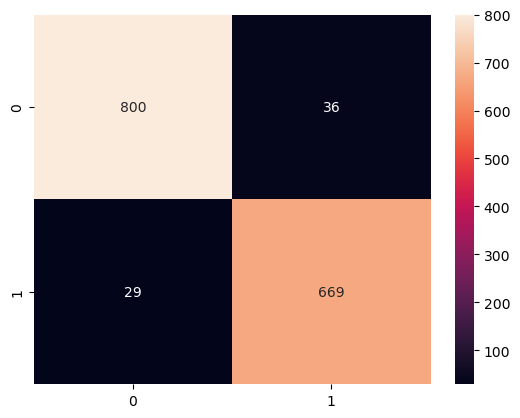

In [1067]:
pred_hybrid = np.squeeze(np.round(hybrid_model.predict([test_text, test_char_text])))
score_model(test_label,pred_hybrid)

In [1068]:
ebd_tribrid = Embedding(
    input_dim=max_vocab,
    output_dim=128,
    input_length=avg,
    name = 'embedding_tribrid'
)

In [1069]:
#Token embedding
input_tok = layers.Input(shape=(1,),dtype='string')
x = tvx(input_tok)
x = ebd_tribrid(x)
x = layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(32,activation='relu')(x)
token_model = Model(input_tok,x)

#Character embedding
input_char = layers.Input(shape=(1,),dtype='string')
y = tvx_char(input_char)
y = ebd_char(y)
y = layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(y)
y = layers.Dropout(0.5)(y)
y = layers.GlobalMaxPool1D()(y)
y = layers.Dense(32,activation='relu')(y)
char_model = Model(input_char,y)

#Kalimat
input_kal = layers.Input(shape=(12,),dtype='int32')
p = layers.Dense(32,activation='relu')(input_kal)
kalimat_model = Model(input_kal,p)

#Kata
input_kat = layers.Input(shape=(38,),dtype='int32')
q = layers.Dense(32,activation='relu')(input_kat)
kata_model = Model(input_kat,q)

#Angka
input_ang = layers.Input(shape=(18,),dtype='int32')
r = layers.Dense(32,activation='relu')(input_ang)
angka_model = Model(input_ang,r)

#Link
input_lin = layers.Input(shape=(14,),dtype='int32')
s = layers.Dense(32,activation='relu')(input_lin)
link_model = Model(input_lin,s)

#Concatenate
token_char = layers.Concatenate(name='token_char_hybrid')([token_model.output,char_model.output])

#Avoid overfitting
z = layers.Dropout(0.5)(token_char)
z = layers.Dense(32,activation='relu')(z)

#Concatenate
tribrid_model = layers.Concatenate(name='multimodel_tribrid')([z,kalimat_model.output,kata_model.output, 
                                                               angka_model.output,link_model.output])

#Output
final = layers.Dense(16,activation='relu')(tribrid_model)
outputs = layers.Dense(1,activation='sigmoid')(final)

#Construct
tribrid_model = Model(inputs=[token_model.input,char_model.input,kalimat_model.input,kata_model.input,
                             angka_model.input,link_model.input],
                    outputs=outputs,
                    name='tribrid_multimodel_embedding')

#Compile
tribrid_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [1070]:
tribrid_model.summary()

Model: "tribrid_multimodel_embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_139 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_140 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_14 (TextVec  (None, 203)         0           ['input_139[0][0]']              
 torization)                                                                                      
                                                                                                  
 text_vectorization_15 (TextVec  (None, 2151)        0           ['inpu

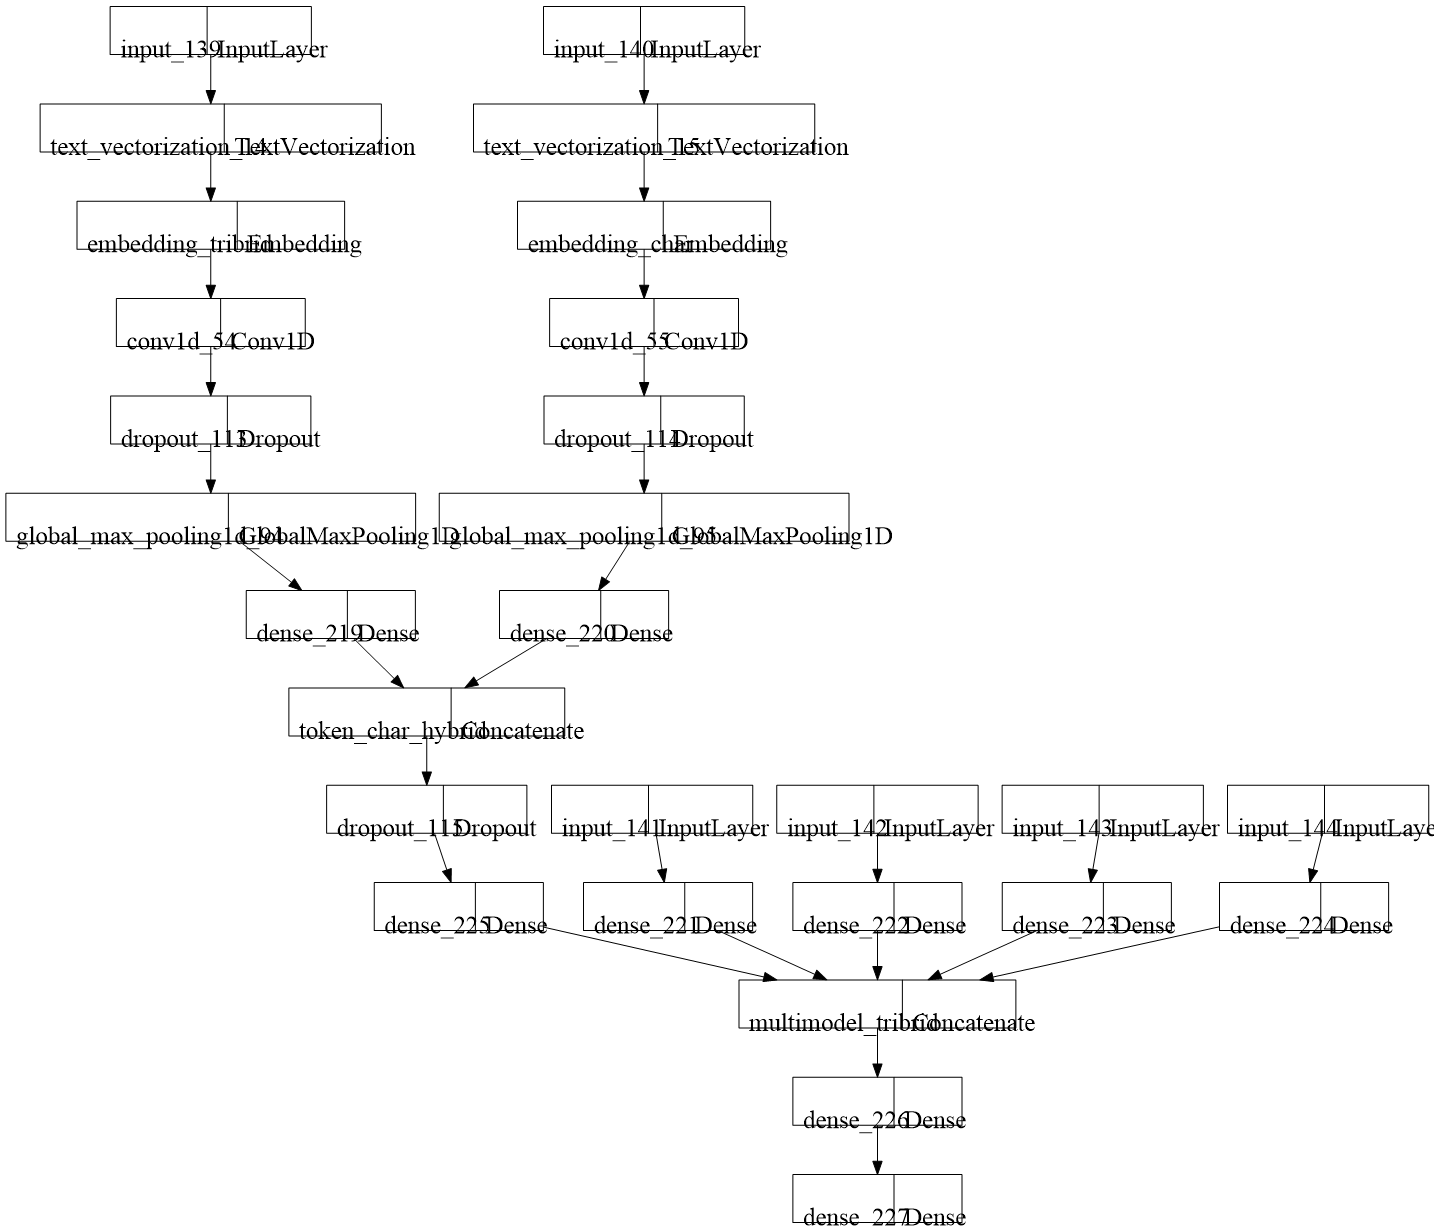

In [1071]:
plot_model(tribrid_model)

In [1078]:
max_mod = ModelCheckpoint(
    filepath='weight_best.tf',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
tribrid_model.fit(
    [train_text, train_char_text, train_kalimat, train_kata, train_angka, train_link],
    train_label,
    epochs=16,
    validation_data=([test_text, test_char_text, test_kalimat, test_kata, test_angka, test_link],test_label),
    callbacks=[max_mod,
              early_stop])

Epoch 1/16
192/192 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9938

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 35s 181ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0982 - val_accuracy: 0.9570
Epoch 2/16
192/192 [==============================] - 32s 164ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0938 - val_accuracy: 0.9570
Epoch 3/16
192/192 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9963

INFO:tensorflow:Assets written to: weight_best.tf\assets


INFO:tensorflow:Assets written to: weight_best.tf\assets


192/192 [==============================] - 35s 184ms/step - loss: 0.0160 - accuracy: 0.9963 - val_loss: 0.0982 - val_accuracy: 0.9589
Epoch 4/16
192/192 [==============================] - 32s 167ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.1154 - val_accuracy: 0.9518
Epoch 5/16
192/192 [==============================] - 32s 164ms/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.1049 - val_accuracy: 0.9570
Epoch 6/16
192/192 [==============================] - 32s 164ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.1100 - val_accuracy: 0.9589
Epoch 6: early stopping


In [1073]:
tribrid_model.load_weights('weight_best.tf/')

In [1074]:
tribrid_model.evaluate([test_text, test_char_text, test_kalimat, test_kata, test_angka, test_link],test_label)

48/48 [==============================] - 1s 23ms/step - loss: 0.0974 - accuracy: 0.9635


[0.09741900116205215, 0.9634941220283508]

48/48 [==============================] - 1s 24ms/step


{'accuracy': 96.34941329856585,
 'precision': 0.9636598823584155,
 'recall': 0.9634941329856584,
 'f1': 0.9635177488429479}

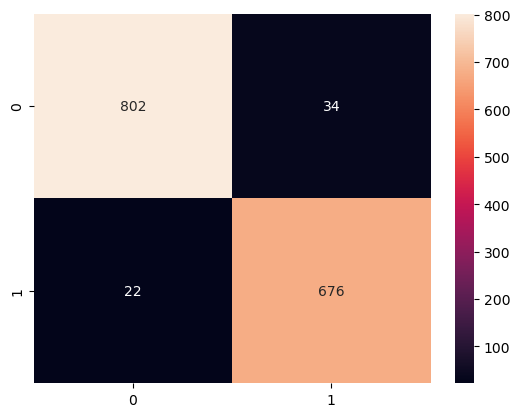

In [1075]:
pred_tribrid = np.squeeze(np.round(tribrid_model.predict([test_text, test_char_text, test_kalimat, test_kata, test_angka, test_link])))
score_model(test_label,pred_tribrid)

In [1076]:
vocab = tvx.get_vocabulary()
wgt = tribrid_model.get_layer('embedding_tribrid').get_weights()[0]

In [1077]:
# #Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = wgt[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")